<a href="https://www.kaggle.com/code/lucihere/nerve-simulations?scriptVersionId=221815893" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!wget "https://raw.githubusercontent.com/neuronsimulator/nrn/master/share/examples/nrniv/netcon/vecevent.mod" # VecStim .mod file
!wget "https://raw.githubusercontent.com/neuronsimulator/nrn/master/share/examples/nrniv/netcon/vecevent.hoc" # VecStim .hoc file
!wget "https://raw.githubusercontent.com/neuronsimulator/nrn/master/share/examples/nrniv/netcon/vecevent.ses" # VecStim .ses file

--2025-02-10 15:11:34--  https://raw.githubusercontent.com/neuronsimulator/nrn/master/share/examples/nrniv/netcon/vecevent.mod
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2629 (2.6K) [text/plain]
Saving to: 'vecevent.mod'

vecevent.mod        100%[===================>]   2.57K  --.-KB/s    in 0s      

2025-02-10 15:11:34 (29.1 MB/s) - 'vecevent.mod' saved [2629/2629]

--2025-02-10 15:11:35--  https://raw.githubusercontent.com/neuronsimulator/nrn/master/share/examples/nrniv/netcon/vecevent.hoc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

In [2]:
!git clone "https://github.com/ModelDBRepository/3810" #Mammalian Axon model

Cloning into '3810'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22 (from 1)
Unpacking objects: 100% (22/22), 6.80 KiB | 870.00 KiB/s, done.


In [3]:
!pip3 install neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 82.7 MB/s eta 0:00:00:00:0100:01


In [4]:
!pip3 freeze > requirements.txt

In [5]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

In [ ]:
#%%writefile "/kaggle/working/vecevent.hoc" This is for debugging and modifying VecStim

In [7]:
from neuron import h
from neuron.units import mV, ms

--No graphics will be displayed.


In [8]:
#Run this cell twice
h.load_file("/kaggle/working/3810/MRGaxon.hoc")
h.load_file("/kaggle/working/vecevent.mod")
h.load_file("/kaggle/working/vecevent.ses") 
h.load_file("/kaggle/working/vecevent.hoc")
h.load_file("stdrun.hoc")

NEURON: axnode is not a MECHANISM
sh: 1: /opt/conda/lib/python3.10/site-packages/neuron/.data/share/nrn/lib/hocload.sh: Permission denied
 in MRGaxon.hoc near line 80
Couldn't find a file that declares nrnmainmenu
 			insert axnode			
                ^
        xopen("MRGaxon.hoc")
      execute1("{xopen("MR...")
    load_file("/kaggle/wo...")
NEURON: syntax error
 in vecevent.mod near line 1
 :  Vector stream of events
 ^
        xopen("vecevent.mod")
      execute1("{xopen("ve...")
    load_file("/kaggle/wo...")
NEURON: VecStim is not a Mechanism or Point Process
 in vecevent.ses near line 16
 }
  ^
        ArtCellGUI[0].MechanismStandard("VecStim")
      xopen("vecevent.ses")
    execute1("{xopen("ve...")
  load_file("/kaggle/wo...")
NEURON: VecStim is not a Mechanism or Point Process
 in vecevent.ses near line 16
 }
  ^
        ArtCellGUI[1].MechanismStandard("VecStim")
      xopen("vecevent.ses")
    execute1("{xopen("ve...")
  load_file("vecevent.ses")
and others
NEURON: vs_VecSti

	1 
	1 
	1 
	1 
	0 
	Vector[3] 


1.0

In [28]:
!nrnivmodl

/opt/conda/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/kaggle/working
Mod files: "./vecevent.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


In [ ]:
#with open('/kaggle/working/3810/MRGaxon.hoc') as f: s = f.read(); print(s) # Axon Model original HOC Code

In [ ]:
#with open('/kaggle/working/3810/MRGaxon.ses') as f: s = f.read(); print(s) # Stimulation model original code

#### Multi-compartment double cable model of a mammalian axon.
The models consisted of 21 nodes of Ranvier separated by 20 internodes.<br><br>
Each internodal section of the model consisted of 2 paranodal myelin attachment segments (MYSA), 2 paranodal main segments (FLUT), and 6 internodal segments (STIN).<br><br>
The nodal membrane dynamics included fast (Na$_f$) and persistent (Na$_p$) sodium, slow potassium (K$_s$), and linear leakage (L$_k$) conductances in parallel with the nodal capacitance (C$_n$).<br><br>
The internodal segments were represented by a double cable structure of linear conductances with an explicit representation of the myelin sheath (G$_m$ in parallel with C$_m$) and the internodal axolemma (G$_i$ in parallel with C$_i$). <br><br>
Below is the reference diagram of one mammalian axon model.

<img src="https://raw.githubusercontent.com/Diacod-I/3810/refs/heads/main/images_medium_9k0322184001.jpeg" width="400"/>
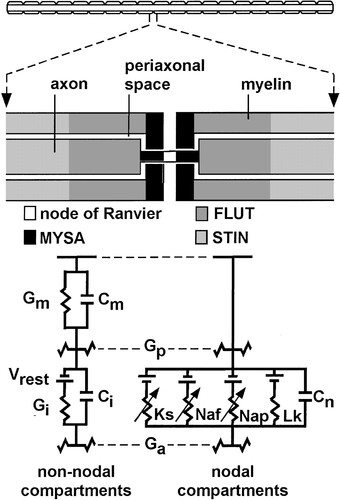
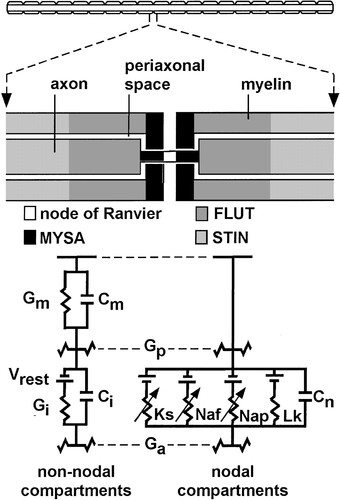
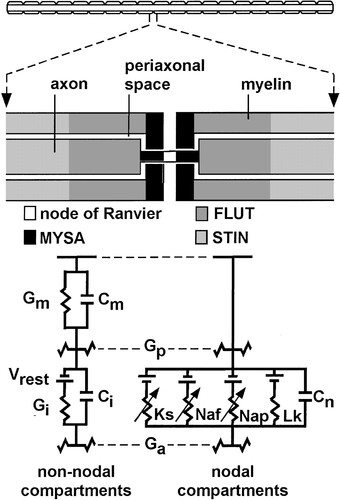
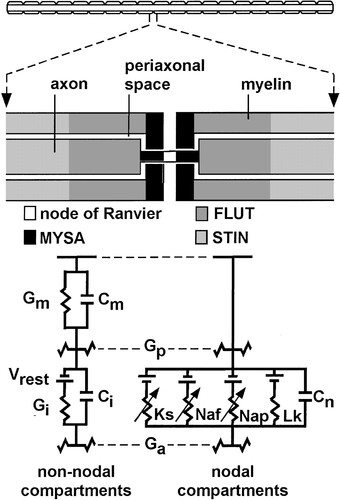

## Defining the nerve fiber structure

In [10]:
# Global parameters
# I have added comments for reference which contains the original param values provided by McIntyre et al.
h.celsius = 37 # Temp Original value was 37
v_init = 0  # mV Original value was -80
h.dt = 0.005  # ms Original value was 0.005
h.tstop = 10 # Time stop Original value was 10

Putting the HOC morphology here for reference

    for i=0, axonnodes-2 {
		connect MYSA[2*i](0), node[i](1)
		connect FLUT[2*i](0), MYSA[2*i](1)
		connect STIN[6*i](0), FLUT[2*i](1)
		connect STIN[6*i+1](0), STIN[6*i](1)
		connect STIN[6*i+2](0), STIN[6*i+1](1)
		connect STIN[6*i+3](0), STIN[6*i+2](1)
		connect STIN[6*i+4](0), STIN[6*i+3](1)	
		connect STIN[6*i+5](0), STIN[6*i+4](1)	
		connect FLUT[2*i+1](0), STIN[6*i+5](1)
		connect MYSA[2*i+1](0), FLUT[2*i+1](1)
		connect node[i+1](0), MYSA[2*i+1](1)	
		}


### 1) Make an Axon class

In [11]:
class Axon:
    # The original code was written in HOC. Since connecting multiple axons was not possible, I coded up my
    # own class of axon which I can use in a different nerve fiber class
    def __init__(self, fiberD=10.0, paralength1=3, nodelength=1.0, space_p1=0.002, space_p2=0.004, space_i=0.004):
        
        # Choose fiberD (fiber diameter value) value from among these values: 5.7, 7.3, 8.7, 10.0, 11.5, 12.8, 14.0, 15.0, 16.0
        # The list of ore-made model params for the corresponding fiber diameter that are functioning can be seen if you 
        #scroll down to self.params
        
        """
        fiberD: total fiber diameter
        paralength1: MYSA length
        nodelength: node length
        space_p1: width of the periaxonal space at MYSA
        space_p2: width of periaxonal space at FLUT
        space_i: width of the periaxonal space in the internodal region
        
        """
        
        assert nodelength > 0, "nodelength needs to be greater than 0"
        assert paralength1 > 0, "paralength1 needs to be greater than 0"
        assert space_p1 > 0, "space_p1 needs to be greater than 0"
        assert space_p2 > 0, "space_p2 needs to be greater than 0"
        assert space_i > 0, "space_i needs to greater than 0"
        assert axonD < fiberD
        
        # Intracellular stimulation parameters
        # self.istim = 2
        # self.delay = 1
        # self.pw = 0.1

        # Topological parameters
        self.axonnodes = 21
        self.paranodes1 = 40
        self.paranodes2 = 40
        self.axoninter = 120
        self.axontotal = 221

        # Morphological parameters
        self.fiberD = fiberD
        self.paralength1 = paralength1
        self.nodelength = nodelength
        self.space_p1 = space_p1
        self.space_p2 = space_p2
        self.space_i = space_i

        # Electrical parameters
        self.rhoa = 0.7e6  # Ohm-um
        self.mycm = 0.1  # uF/cm2/lamella membrane
        self.mygm = 0.001  # S/cm2/lamella membrane

        # Dependent variables based on fiberD
        self.params = {
            5.7: (0.605, 3.4, 1.9, 1.9, 3.4, 500, 35, 80),
            7.3: (0.630, 4.6, 2.4, 2.4, 4.6, 750, 38, 100),
            8.7: (0.661, 5.8, 2.8, 2.8, 5.8, 1000, 40, 110),
            10.0: (0.690, 6.9, 3.3, 3.3, 6.9, 1150, 46, 120),
            11.5: (0.700, 8.1, 3.7, 3.7, 8.1, 1250, 50, 130),
            12.8: (0.719, 9.2, 4.2, 4.2, 9.2, 1350, 54, 135),
            14.0: (0.739, 10.4, 4.7, 4.7, 10.4, 1400, 56, 140),
            15.0: (0.767, 11.5, 5.0, 5.0, 11.5, 1450, 58, 145),
            16.0: (0.791, 12.7, 5.5, 5.5, 12.7, 1500, 60, 150),
        }

        """
        g: g-ratio
        axonD: axoplasm diameter
        nodeD: node diameter
        paraD1: MYSA diameter
        paraD2: FLUT diameter
        deltax: single segment length (single segment =  node <-> MYSA <-> FLUT <-> STIM....STIM <-> FLUT <-> MYSA <-> node)
        paralength2: FLUT length
        nl: Number of Lamellae layers
        """


        if fiberD in (5.7, 7.3, 8.7, 10.0, 11.5, 12.8, 14.0, 15.0, 16.0):
            #Working on the equation to calculate params for a given diameter            
            (self.g, self.axonD, self.nodeD, self.paraD1, self.paraD2, self.deltax, self.paralength2, self.nl) = self.params[fiberD]

        #resistance of the periaxonal space at the node
        self.Rpn0 = (self.rhoa * 0.01) / (pi * (((self.nodeD / 2 + self.space_p1) ** 2) - ((self.nodeD / 2) ** 2)))
        #resistance of the periaxonal space at MYSA
        self.Rpn1 = (self.rhoa * 0.01) / (pi * (((self.paraD1 / 2 + self.space_p1) ** 2) - ((self.paraD1 / 2) ** 2)))
        #resistance of the periaxonal space at FLUT
        self.Rpn2 = (self.rhoa * 0.01) / (pi * (((self.paraD2 / 2 + self.space_p2) ** 2) - ((self.paraD2 / 2) ** 2)))
        #resistance of the periaxonal space in STIM
        self.Rpx = (self.rhoa * 0.01) / (pi * (((self.axonD / 2 + self.space_i) ** 2) - ((self.axonD / 2) ** 2)))
        #length of the internodal segment
        self.interlength = (self.deltax - self.nodelength - 2 * self.paralength1 - 2 * self.paralength2) / 6

        # Sections
        self.node = [h.Section(name=f'node_{i}') for i in range(self.axonnodes)]
        self.MYSA = [h.Section(name=f'MYSA_{i}') for i in range(self.paranodes1)]
        self.FLUT = [h.Section(name=f'FLUT_{i}') for i in range(self.paranodes2)]
        self.STIN = [h.Section(name=f'STIN_{i}') for i in range(self.axoninter)]

        
        self.axon = None
        self._setup_biophysics()
        self._setup_morphology()

    def _setup_biophysics(self):
        # Nodes Biophysics
        for sec in self.node:
            sec.nseg = 1
            sec.diam = self.nodeD
            sec.L = self.nodelength
            sec.Ra = self.rhoa / 10000
            sec.cm = 2
            sec.insert('extracellular')
            sec.xraxial[0] = self.Rpn0
            sec.xg[0] = 1e10
            sec.xc[0] = 0

        # MYSA Biophysics
        for sec in self.MYSA:
            sec.nseg = 1
            sec.diam = self.fiberD
            sec.L = self.paralength1
            sec.Ra = self.rhoa * (1 / (self.paraD1 / self.fiberD) ** 2) / 10000
            sec.cm = 2 * self.paraD1 / self.fiberD
            sec.insert('pas')
            sec.g_pas = 0.001 * self.paraD1 / self.fiberD
            sec.e_pas = -80
            sec.insert('extracellular')
            sec.xraxial[0] = self.Rpn1
            sec.xg[0] = self.mygm / (self.nl * 2)
            sec.xc[0] = self.mycm / (self.nl * 2)

        # FLUT Biophysics
        for sec in self.FLUT:
            sec.nseg = 1
            sec.diam = self.fiberD
            sec.L = self.paralength2
            sec.Ra = self.rhoa * (1 / (self.paraD2 / self.fiberD) ** 2) / 10000
            sec.cm = 2 * self.paraD2 / self.fiberD
            sec.insert('pas')
            sec.g_pas = 0.0001 * self.paraD2 / self.fiberD
            sec.e_pas = -80
            sec.insert('extracellular')
            sec.xraxial[0] = self.Rpn2
            sec.xg[0] = self.mygm / (self.nl * 2)
            sec.xc[0] = self.mycm / (self.nl * 2)

        # STIN Biophysics
        for sec in self.STIN:
            sec.nseg = 1
            sec.diam = self.fiberD
            sec.L = self.interlength
            sec.Ra = self.rhoa * (1 / (self.axonD / self.fiberD) ** 2) / 10000
            sec.cm = 2 * self.axonD / self.fiberD
            sec.insert('pas')
            sec.g_pas = 0.0001 * self.axonD / self.fiberD
            sec.e_pas = -80
            sec.insert('extracellular')
            sec.xraxial[0] = self.Rpx
            sec.xg[0] = self.mygm / (self.nl * 2)
            sec.xc[0] = self.mycm / (self.nl * 2)
    
    def _setup_morphology(self):
        for i in range(0, self.axonnodes - 1):
            self.axon = self.MYSA[2*i].connect(self.node[i])
            self.FLUT[2*i].connect(self.MYSA[2*i])
            self.STIN[6*i].connect(self.FLUT[2*i])
            self.STIN[6*i+1].connect(self.STIN[6*i])
            self.STIN[6*i+2].connect(self.STIN[6*i+1])
            self.STIN[6*i+3].connect(self.STIN[6*i+2])
            self.STIN[6*i+4].connect(self.STIN[6*i+3])	
            self.STIN[6*i+5].connect(self.STIN[6*i+4])	
            self.FLUT[2*i+1].connect(self.STIN[6*i+5])
            self.MYSA[2*i+1].connect(self.FLUT[2*i+1])
            self.node[i+1].connect(self.MYSA[2*i+1])

### 2) Use the Axon class to make a Nerve class

In [12]:
# This is for adding soma at each end of the nerve fiber for stimulation experiments
class BallAndStick:
    def __init__(self):
        self._setup_morphology()
        self._setup_biophysics()

    def _setup_morphology(self):
        self.soma = h.Section(name="soma", cell=self)
        #self.dend = h.Section(name="dend", cell=self)
        #self.dend.connect(self.soma)
        self.soma.L = self.soma.diam = 12.6157
        #self.dend.L = 200
        #self.dend.diam = 1

    def _setup_biophysics(self):
        for sec in self.soma.wholetree():
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
        self.soma.insert("hh")
        for seg in self.soma:
            seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
            seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
            seg.hh.gl = 0.0003  # Leak conductance in S/cm2
            seg.hh.el = -54.3  # Reversal potential in mV
        # Insert passive current in the dendrite
        #self.dend.insert("pas")
        #for seg in self.dend:
        #    seg.pas.g = 0.001  # Passive conductance in S/cm2
        #    seg.pas.e = -65  # Leak reversal potential mV

        # NEW: the synapse
        #self.syn = h.ExpSyn(self.dend(0.5))
        #self.syn.tau = 2 * ms

In [25]:
try:
    vs = h.VecStim()
    print(vs)
    print("Successful")
except AttributeError as error:
    # https://raw.githubusercontent.com/neuronsimulator/nrn/master/share/examples/nrniv/netcon/vecevent.mod
    print(f"h.VecStim is not defined; Compilation problem :( \n{error}")

h.VecStim is not defined; Compilation problem :( 
'hoc.HocObject' object has no attribute 'VecStim'


In [14]:
class Nerve:
    def __init__(self, num_axons = 2): 
        assert num_axons > 0, "num_axons should be greater than 0"
        self.num_axons = num_axons
        self.axons = [Axon() for i in range(num_axons)]
        self.syns = []
        self.netcons = []
        #self.tau = tau
        self._setup_nerve()
        self._setup_stim()

    def _setup_nerve(self):
        assert self.num_axons > 1, "No need to setup nerve if num_axons is less than 1"
        count = 0
        for source, target in zip(self.axons[:-1], self.axons[1:]):
            #self.axons[i].MYSA[-1].connect(self.axons[i + 1].node[0])
            #_syn = h.ExpSyn(self.axons[i + 1].node[0](0.5))
            #_syn = h.ExpSyn(self.axons[i + 1].node[0](0.5))
            #_syn.tau = self.tau
            #_netcon = h.NetCon(self.) # DONT ADD NETCONSSS HEREEE!!!!!
            #self.syns.append(_syn)
            target.MYSA[0].connect(source.node[-1])
        self.axons[-1].MYSA[-1].connect(self.axons[-1].FLUT[-1])
        self.axons[-1].node[-1].connect(self.axons[-1].MYSA[-1])
        self.end_l = BallAndStick()
        self.end_r = BallAndStick()
        self.axons[0].node[0].connect(self.end_l.soma)
        self.end_r.soma.connect(self.axons[-1].node[-1])
        
    def _setup_stim(self, N=100): 
        #Will implement after testing with VecStim()
        #VecStim currently has problems compiling unlike other .mod files
        #I am making my own class in case it doesnt work as intended
        
        #self.netstim = 
        #alt = np.empty((N,))
        #alt[::2] = 1
        #alt[1::2] = -1
        #alt = [i * ms for i in alt]
        #self._netcon = h.NetCon(self)
        pass
            
        
    def _topology(self):
        h.topology()

In [15]:
def clear_space(): 
    #Since all models are defined in h on class initialisation, _topology was filled with unnecessary 
    #copies of models.
    
    #Use clear_space() before every nerve fiber creation
    for i in h.allsec():
        h.delete_section(sec=i)

In [16]:
try:
    clear_space()
    test_nerve = Nerve(3)
    print("Successful")
except Exception as error:
    print(f"Error occured:\n{error}")

Successful


Notice: MYSA_0(0) had previously been connected to parent node_0(1)
Notice: MYSA_0(0) had previously been connected to parent node_0(1)
Notice: MYSA_39(0) had previously been connected to parent FLUT_39(1)
Notice: node_20(0) had previously been connected to parent MYSA_39(1)


Throughout the entire nerve fiber, intracellular mechanisms are connected, unlike extracellular synapse based models, to remove leakage.

In [ ]:
# Running the below code will show the full topology of the nerve fiber you built
clear_space()
test_nerve = Nerve(3)
test_nerve._topology()

# |-| means not connected
# `| means connected

#### Sciatic Nerve and Tibial Nerve
Look for Fiber Diameter distribution and morphology <br>
Make a table of that <br>
Duration of stimulation: 2 sec trains normally, see for current results for adaptation <br>
Pulse Width: 60 - 500 microseconds

 ### 3) Biphasic stimulation class through VecStim
 #### (WIP!! BELOW FUNCTIONS ARE BEING MADE IN THE SCENARIO VECSTIM CANT COMPILE!! DO NOT RUN BEYOND THIS POINT)

VecStim is not an inbuilt function in NEURON. It is the closest thing to achieving both monophasic and biphasic spike trains as input times can be modified based

In [ ]:
class VecStim:
    def __init__(self):
        self._ptr = None  # Holds the Vector object
        self.index = 0
        self.etime = 0

    def play(self, v):
        """Sets the vector of spike times."""
        if isinstance(v, h.Vector):
            if self._ptr:
                self._ptr.unref() # Release the old vector
            self._ptr = v
            self._ptr.ref() # Keep the vector alive
        else:
            raise TypeError("Argument must be a NEURON Vector")

    def _element(self):  # Internal method, equivalent to PROCEDURE element()
        if self.index >= 0:
            if self._ptr:
                size = len(self._ptr)  # Use Python's len for Vector size
                if self.index < size:
                    self.etime = self._ptr[self.index]
                    self.index += 1
                else:
                    self.index = -1  # Mark as finished
            else:
                self.index = -1

    def __call__(self, w): # NET_RECEIVE equivalent
        if w == 1:  # Corresponds to flag == 1
            h.net_event(h.t) # Trigger the event
            self._element()
            if self.index > 0:
                h.net_send(self.etime - h.t, 1) # Schedule the next event

    def _destructor(self):  # DESTRUCTOR equivalent
        if self._ptr:
            self._ptr.unref()
            self._ptr = None

    def __del__(self): # Python's destructor
        self._destructor()

In [ ]:
# Example usage (mimicking the HOC and Python examples)
spt = h.Vector(10).indgen(1, 0.2)
vs = VecStim()
vs.play(spt)

def pr():
    print(h.t)

nc = h.NetCon(vs, None)  # Connect VecStim to a NetCon
nc.record(pr)

cvode = h.CVode()
h.finitialize()
cvode.solve(20)

In [ ]:
# For saving and restoring
def save_vecstim(vs, filename="vecstim_data.dat"):
    if vs._ptr:
        with open(filename, "w") as f:
            for val in vs._ptr:
                f.write(str(val) + "\n")

def load_vecstim(vs, filename="vecstim_data.dat"):
    try:
        v = h.Vector()
        v.read_from_file(filename)
        vs.play(v)
    except FileNotFoundError:
        print(f"File {filename} not found.")

In [ ]:
save_vecstim(vs)
vs2 = VecStim()
load_vecstim(vs2)

# Verify they are the same (or not)
for i in range(len(vs._ptr)):
  print(vs._ptr[i], vs2._ptr[i])